In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from tensorflow.keras.datasets import mnist,fashion_mnist,cifar10

In [31]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


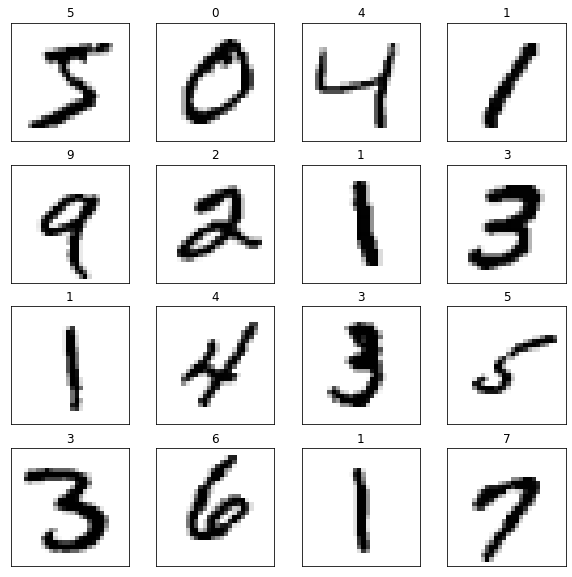

In [32]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap= plt.cm.binary) # cmap= plt.cm.binary
    plt.title(y_train[i])
plt.show()

In [33]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [34]:
# Normalizing
x_train = x_train/255
x_test = x_test/255

# reshaping
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)


In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


#### Model Architecture - M1

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,AveragePooling2D, Flatten, Dropout

In [45]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m1.add(Conv2D(64,(3,3),activation='relu',padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2),strides=2))

m1.add(Dropout(0.2))
m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [116]:
print(64 * (64 * 3 * 3) + 64)
print(32*3136 +32)

36928
100384


In [46]:
m1.summary()
# ConvL1 -> Filters = (64,28,28), input = =(28,28,1)
# param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)
# conv2d_4 -> params = 64 * (1 * 3 * 3) + 64 = 640
# conv2d_5 -> params = 64 * (64 * 3 * 3) + 64 = 36928
# Dense -> param_number = output_channel_number * (input_channel_number + 1)
# dense_2 -> params = 32 * (3136) + 64 = 100384
# dense_3 -> params = 10*32 + 10 = 330

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [47]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
157/157 [==============================] - 9s 52ms/step - loss: 0.6266 - accuracy: 0.8106 - val_loss: 0.2369 - val_accuracy: 0.9200
Epoch 2/15
157/157 [==============================] - 8s 49ms/step - loss: 0.1594 - accuracy: 0.9548 - val_loss: 0.1488 - val_accuracy: 0.9550
Epoch 3/15
157/157 [==============================] - 9s 55ms/step - loss: 0.1043 - accuracy: 0.9668 - val_loss: 0.1001 - val_accuracy: 0.9670
Epoch 4/15
157/157 [==============================] - 8s 52ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0878 - val_accuracy: 0.9680
Epoch 5/15
157/157 [==============================] - 8s 52ms/step - loss: 0.0638 - accuracy: 0.9786 - val_loss: 0.0882 - val_accuracy: 0.9670
Epoch 6/15
157/157 [==============================] - 9s 55ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0879 - val_accuracy: 0.9650
Epoch 7/15
157/157 [==============================] - 9s 57ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.0712 - val_accuracy: 0.9810

In [48]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
10,0.025193,0.9922,0.074976,0.969,10
11,0.011309,0.9968,0.096112,0.967,11
12,0.011614,0.9970,0.082915,0.969,12
13,0.021455,0.9928,0.063332,0.976,13
14,0.012338,0.9956,0.080358,0.971,14


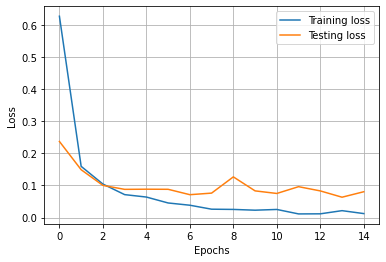

In [49]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

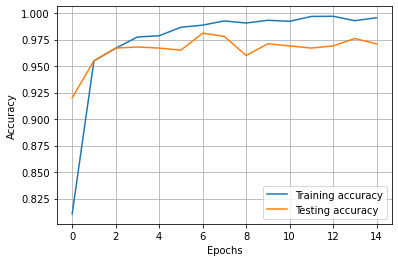

In [50]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [52]:
ypred_m1 = m1.predict(x_test)
ypred_m1

array([[9.0912264e-11, 1.1551762e-11, 1.0926959e-11, ..., 1.0000000e+00,
        2.5686571e-13, 5.5272625e-10],
       [1.0087982e-09, 1.2053370e-07, 9.9999988e-01, ..., 4.3462757e-13,
        6.3874420e-11, 1.2038943e-16],
       [2.2299503e-07, 9.9997902e-01, 5.0019689e-06, ..., 4.1700371e-08,
        2.8583299e-06, 3.0902777e-07],
       ...,
       [1.0000000e+00, 1.1999193e-16, 7.4681433e-12, ..., 6.4250572e-17,
        7.3340266e-12, 1.6516438e-13],
       [8.9190181e-08, 1.6926700e-08, 4.6798894e-07, ..., 1.7271969e-09,
        9.9999940e-01, 4.2002779e-09],
       [1.3188688e-07, 8.6198471e-10, 1.8281548e-10, ..., 3.7953118e-04,
        4.1006551e-06, 9.9904364e-01]], dtype=float32)

In [53]:
print(sum(ypred_m1[0]))
print(sum(ypred_m1[234]))
print(sum(ypred_m1[567]))

1.0000000008571688
1.0000000350225084
0.9999999309592682


In [54]:
ypred_res = [np.argmax(i) for i in ypred_m1]
print(ypred_res)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 3, 9, 3, 9, 0, 3, 6, 5, 5, 7, 3, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 1, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 3, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
cm = confusion_matrix(y_test,ypred_res)
print(cm)
print(classification_report(y_test,ypred_res))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   1   0   0   0   0   0   0   0]
 [  0   1 111   2   0   0   0   1   1   0]
 [  0   0   0 106   0   1   0   0   0   0]
 [  0   0   0   0 108   0   1   0   0   1]
 [  0   0   0   1   0  86   0   0   0   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   1   0   2   1   0   0  93   0   2]
 [  1   0   2   1   0   0   0   1  84   0]
 [  0   1   0   0   1   1   0   0   2  89]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.98      0.99      0.98       126
           2       0.97      0.96      0.97       116
           3       0.95      0.99      0.97       107
           4       0.98      0.98      0.98       110
           5       0.98      0.99      0.98        87
           6       0.98      0.98      0.98        87
           7       0.98      0.94      0.96        99
           8       0.97      0.94      0.95        89
           9       0.97     

In [58]:
m1.save('mnist_Aug3.h5')

In [86]:
print(x_test[562].shape)

test_data = x_test[562].reshape(1,28,28,1)
test_data.shape
res = m1.predict(test_data)
print(res[0])

(28, 28, 1)
[4.0693884e-10 4.1224918e-12 3.1933580e-09 7.6872574e-08 1.3937213e-05
 2.6779487e-10 6.5092705e-09 2.8669817e-06 6.3295431e-08 9.9998295e-01]


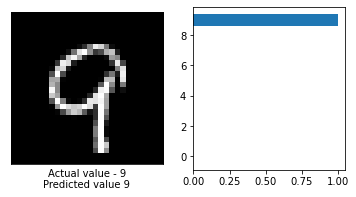

In [81]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(x_test[562],'gray')
plt.xlabel(f'Actual value - {y_test[562]}\nPredicted value {np.argmax(res[0])}')

plt.subplot(1,2,2)
plt.barh(list(range(0,10)),res[0])
plt.show()

In [107]:
def digit_predict(img_idx):
    test_reshape = x_test[img_idx].reshape(1,x_test[img_idx].shape[0],
                                           x_test[img_idx].shape[1],
                                           x_test[img_idx].shape[2])
    res = m1.predict(test_reshape)
    
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[img_idx],'gray')
    plt.xlabel(f'Actual value - {y_test[img_idx]}\nPredicted value {np.argmax(res[0])}')

    plt.subplot(1,2,2)
    plt.barh(list(range(0,10)),res[0],color='maroon')
    plt.grid()
    plt.yticks(np.arange(0,10,1))
    plt.show()

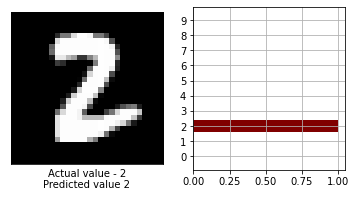

In [108]:
digit_predict(186)

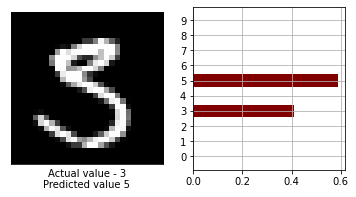

In [109]:
digit_predict(938)

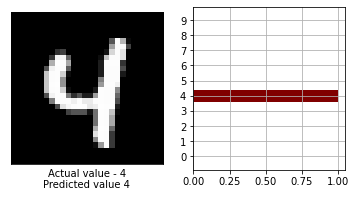

In [110]:
digit_predict(541)

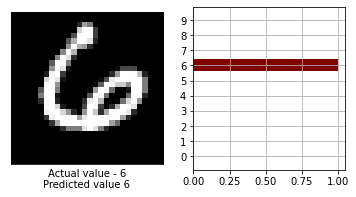

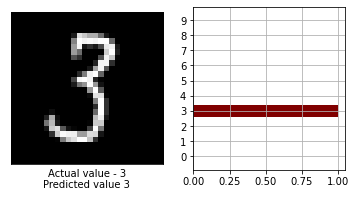

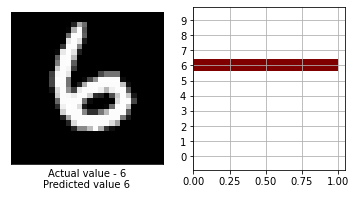

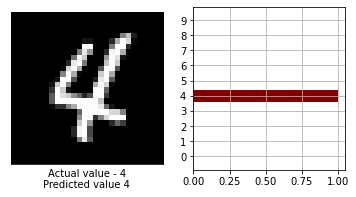

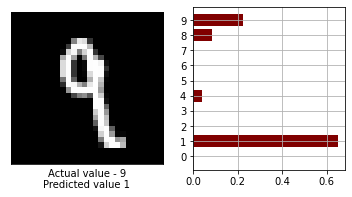

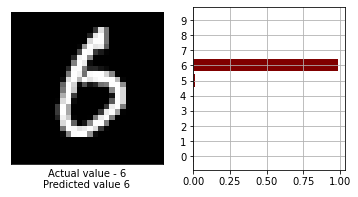

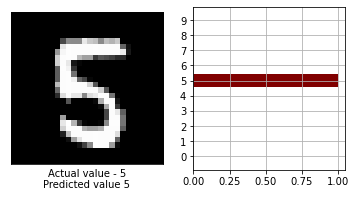

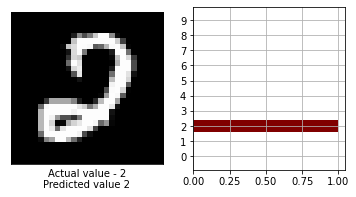

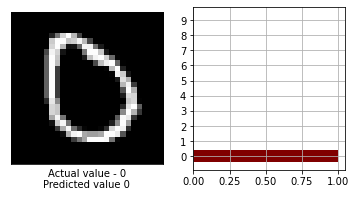

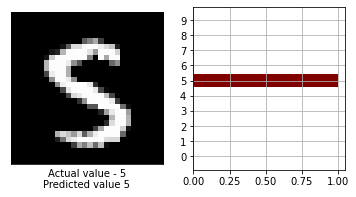

In [112]:
for i in np.random.randint(200,500,10):
    digit_predict(i)

### Dissecting the different layers in CNN

In [118]:
model_layers = [i.name for i in m1.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_4', 'max_pooling2d_2', 'conv2d_5', 'max_pooling2d_3', 'dropout_1', 'flatten_1', 'dense_2', 'dense_3']


In [133]:
from tensorflow.keras.models import Model
conv2d_4_output = Model(inputs=m1.input, outputs=m1.get_layer('conv2d_4').output)
conv2d_5_output = Model(inputs=m1.input, outputs=m1.get_layer('conv2d_5').output)

In [134]:
img = x_test[500]
print(img.shape)
img_res = img.reshape(1,28,28,1)
print(img_res.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [135]:
conv2d_4_features = conv2d_4_output.predict(img_res)
conv2d_5_features = conv2d_5_output.predict(img_res)
print('First conv layer feature output shape : ',conv2d_4_features.shape)
print('Second conv layer feature output shape : ',conv2d_5_features.shape)

First conv layer feature output shape :  (1, 28, 28, 64)
Second conv layer feature output shape :  (1, 14, 14, 64)


### First Conv Layer Output

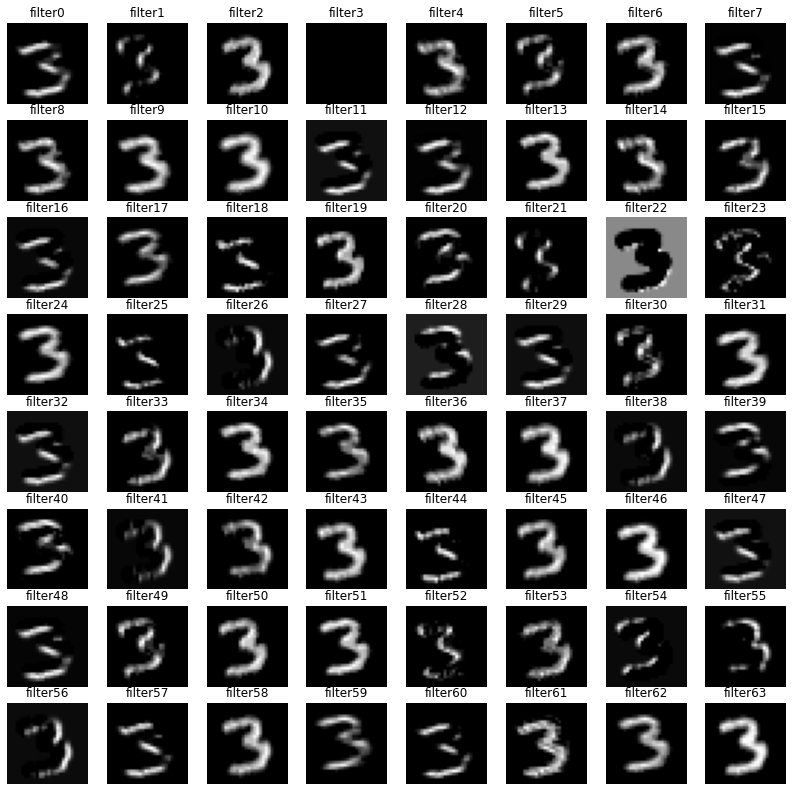

In [136]:
fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_4_features[0, :, :, i], cmap='gray')
plt.show()

### Second Conv Layer Output

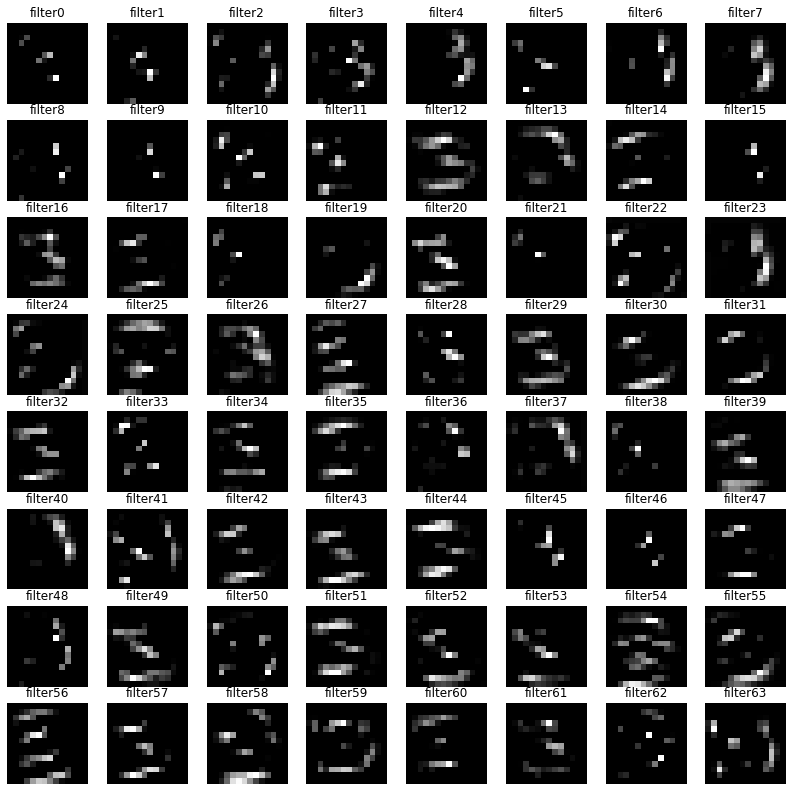

In [137]:
fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_5_features[0, :, :, i], cmap='gray')
plt.show()

In [138]:
### CIFAR10

In [145]:
(x_train1,y_train1),(x_test1,y_test1) = cifar10.load_data()
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [146]:
y_train1 = y_train1.reshape(50000)
print(y_train1.shape)
y_test1 = y_test1.reshape(10000)
print(y_test1.shape)

(50000,)
(10000,)


In [152]:
y_train1[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [147]:
print(len(set(y_train1)))
print()

10


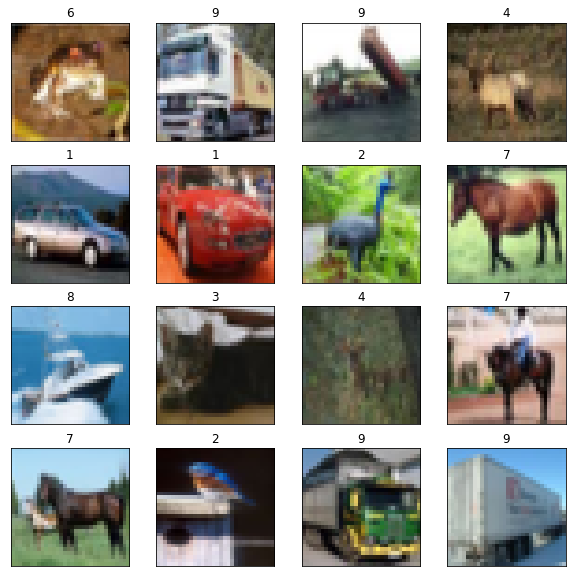

In [148]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train1[i],cmap= plt.cm.binary) # cmap= plt.cm.binary
    plt.title(y_train1[i])
plt.show()